In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import sklearn.metrics
from sklearn.preprocessing import PolynomialFeatures

In [43]:
data = pd.read_csv(r'D:\School\Spring 2020\ECN 5090\Machine_Learning_USU\Spring 2020\HW\HW regression- NY property sale\nyc-rolling-sales_clean.csv', 
                   dtype={'RESIDENTIAL UNITS':'int32','COMMERCIAL UNITS ':'int32','LAND SQUARE FEET':'float32', 'GROSS SQUARE FEET':'float32', 'TAX CLASS AT TIME OF SALE':'int16',
                         'SALE PRICE':'float32', 'sale_month':'int8'},
                  parse_dates = ['SALE DATE'],
                  infer_datetime_format = True)
# Attempted to decrease the data 

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30236 entries, 0 to 30235
Data columns (total 18 columns):
BOROUGH                           30236 non-null object
NEIGHBORHOOD                      30236 non-null object
BUILDING CLASS CATEGORY           30236 non-null object
TAX CLASS AT PRESENT              30236 non-null object
BUILDING CLASS AT PRESENT         30236 non-null object
ZIP CODE                          30236 non-null int64
RESIDENTIAL UNITS                 30236 non-null int32
COMMERCIAL UNITS                  30236 non-null int64
TOTAL UNITS                       30236 non-null int64
LAND SQUARE FEET                  30236 non-null float32
GROSS SQUARE FEET                 30236 non-null float32
YEAR BUILT                        30236 non-null int64
TAX CLASS AT TIME OF SALE         30236 non-null int16
BUILDING CLASS AT TIME OF SALE    30236 non-null object
SALE PRICE                        30236 non-null float32
SALE DATE                         30236 non-null datet

In [45]:
data.shape

(30236, 18)

In [46]:
cat_cols = ['BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT', 'BUILDING CLASS AT PRESENT', 'BUILDING CLASS AT TIME OF SALE', 'ZIP CODE', 'sale_year', 'sale_month', 'YEAR BUILT']


In [47]:
for i in cat_cols:
    data[i] = data[i].astype('category')

In [48]:
data.columns

Index(['BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AT PRESENT', 'BUILDING CLASS AT PRESENT', 'ZIP CODE',
       'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
       'SALE PRICE', 'SALE DATE', 'sale_year', 'sale_month'],
      dtype='object')

In [49]:
data = data.drop(['SALE DATE','TOTAL UNITS', 'sale_year', 'ZIP CODE', 'YEAR BUILT'], axis=1)

In [50]:
data.isnull().sum()

BOROUGH                           0
NEIGHBORHOOD                      0
BUILDING CLASS CATEGORY           0
TAX CLASS AT PRESENT              0
BUILDING CLASS AT PRESENT         0
RESIDENTIAL UNITS                 0
COMMERCIAL UNITS                  0
LAND SQUARE FEET                  0
GROSS SQUARE FEET                 0
TAX CLASS AT TIME OF SALE         0
BUILDING CLASS AT TIME OF SALE    0
SALE PRICE                        0
sale_month                        0
dtype: int64

D:\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


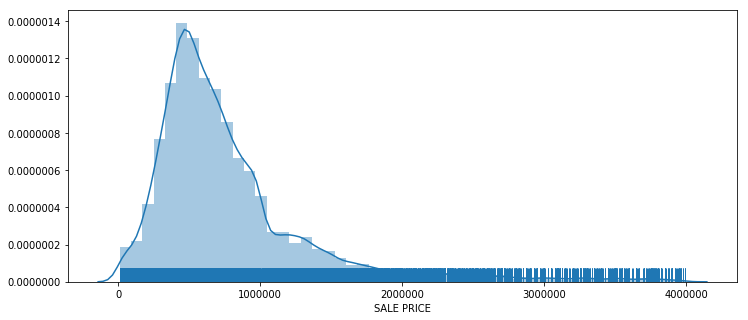

In [51]:
plt.figure(figsize=(12,5))
sns.distplot(data['SALE PRICE'], bins=50 , rug=True)
plt.show()

D:\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


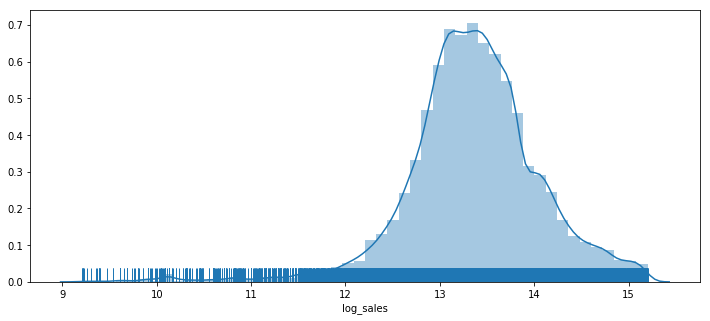

In [52]:
# log change SALE PRICE to avoid heteroskedasticity

plt.figure(figsize=(12,5))
data['log_sales']= np.log(data['SALE PRICE'])
sns.distplot(data['log_sales'], bins=50 , rug=True)
plt.show()

In [53]:
data_2 = data.copy()

In [54]:
data_2 = pd.get_dummies(data, drop_first=True)
data_2.shape

(30236, 536)

In [55]:
X = data_2.loc[:, data_2.columns != 'log_sales']
y = data_2.loc[:, data_2.columns == 'log_sales']

In [56]:
X.drop(['SALE PRICE'], axis = 1, inplace = True)

D:\Anaconda\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [57]:
X.shape

(30236, 534)

In [58]:
rambo_state = 1000 # Setting the seed

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = rambo_state)

In [60]:
X_train.shape

(21165, 534)

## Question 1

In [61]:
lin_model = LinearRegression()

In [62]:
lin_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [63]:
# intercept
lin_model.intercept_

array([13.04065851])

In [64]:
# R^2
lin_model.score(X_train,y_train)

0.4794555543173451

In [65]:
type(y.values)

numpy.ndarray

In [66]:
# Adjusted R^2 calc using obs and features
R2 = lin_model.score(X_train,y_train)
n = X_train.shape[0]
p = X_train.shape[1]

# Adjusted R^2 formula
adjusted_R2 = 1-(1-R2)*(n-1)/(n-p-1)
adjusted_R2

0.4659814518454819

In [67]:
len(lin_model.coef_[0])

534

In [68]:
summary = pd.DataFrame(data = X_train.columns, columns=['Features'])
summary ['Coefficients'] = lin_model.coef_[0]
summary

,Features,Coefficients
0,RESIDENTIAL UNITS,-0.008078
1,COMMERCIAL UNITS,-0.000089
2,LAND SQUARE FEET,-0.000002
3,GROSS SQUARE FEET,0.000006
4,TAX CLASS AT TIME OF SALE,-0.039160
...,...,...
529,sale_month_8,0.057581
530,sale_month_9,-0.050176
531,sale_month_10,-0.034407
532,sale_month_11,-0.035149


In [69]:
# Checking first four
lin_model.predict(X_test).squeeze()[0:4]

array([13.75077506, 13.00831071, 13.11252747, 13.1347051 ])

#y_test is currently a pandas dataframe. Convert to series to solve shape issues. 
y_series = y_test['log_sales']

In [70]:
y_hat_test = lin_model.predict(X_test)
log_predictions = pd.DataFrame( {'Actuals':y_test.squeeze() , 'Predictions': y_hat_test.squeeze()})
predictions = np.exp(log_predictions)
predictions.head()

,Actuals,Predictions
3767,1.300000e+06,9.373154e+05
24270,5.400001e+05,4.461055e+05
27718,6.499999e+05,4.951062e+05
6232,3.900001e+05,5.062091e+05
11161,8.999998e+05,1.147950e+06


In [71]:
MSE_test = round(np.mean(np.square(predictions['Actuals'] - predictions['Predictions'])),2)
MSE_test

188622467603.98

In [72]:
RMSE_test = round(np.sqrt(MSE_test),2)
RMSE_test

434306.88

Our RMSE is $434,306.9

## Question 2

In [73]:
model = LinearRegression()

In [89]:
%time NMSE_5 = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 5, scoring = 'neg_mean_squared_error' n_jobs = -1)

Wall time: 1.93 s


In [90]:
%time NMSE_10 = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 10, scoring = 'neg_mean_squared_error', n_jobs = -1)

Wall time: 3.85 s


In [76]:
MSE_5 = np.mean(-NMSE_5)
print(MSE_5)
MSE_10 = np.mean(-NMSE_10)
print(MSE_10)

0.9807049228597571
1.0240728472824967


In [77]:
RMSE_5 = np.sqrt(-NMSE_5)
print(RMSE_5.mean())
RMSE_10 = np.sqrt(-NMSE_10)
print(RMSE_10.mean())

0.850199273091991
0.7969840884480386


Assuming that is in the same units ($), the RMSE_CV's are much better compared to the simple linear regression model above. This is how it should be, based on what we know of Cross validations. Cross validation takes different subsets of the training data to get different coeffeceints, based on the number of folds, and then averages it. 

## Question 3

In [83]:
answer = []
#p = np.linspace(0,10,100)

for this_n in [2]:
    poly = PolynomialFeatures(degree = this_n)
    p_poly = poly.fit_transform(X.squeeze())
    X_train_poly = poly.fit_transform(X_train.squeeze())
    linreg = LinearRegression(n_jobs = -1).fit(X_train_poly, y_train)
    pred_y = linreg.predict(p_poly)
    answer.append(pred_y)
       
answer_1 = np.stack(answer)

MemoryError: Unable to allocate array with shape (30236, 143380) and data type float64

In [ ]:
answer_1

MSE_test = round(np.mean(np.square(predictions['Actuals'] - predictions['Predictions'])),2)
MSE_test

RMSE_test = round(np.sqrt(MSE_test),2)
RMSE_test

In [82]:
MSE_test = []
iterator = range(1, 8) # the second number is polynomial degree -1
for i in iterator:
    X_train, X_test, y_train, y_test = train_test_split(PolynomialFeatures(degree = i).fit_transform(X.squeeze()), y, test_size=0.3, random_state= 100)
    MSE_test.append(-cross_val_score(estimator = model, X = X_train, y = y_train, cv = 5, scoring = 'neg_mean_squared_error', n_jobs = -1))
    
output = pd.DataFrame(list(iterator), columns = ['Poly degree'])
output['MSE_test'] = MSE_test
output

MemoryError: Unable to allocate array with shape (30236, 143380) and data type float64

In [91]:
import os

In [92]:
os.system('jupyter nbconvert --to html yourNotebook.ipynb')

-1